# MI2 - Exercise 02 - The Unsupervised
Group members: Niels-Ole Kühl, Philipp Marian Grulich, Johannes Giersdorf, Julius Hülsmann and Friederike Fischer

## Principal Component Analysis (PCA)

### notation and representation of data

observations: ${\underline{x}^{(\alpha)}} \in \mathbb{R}^N \quad \alpha = 1, \dots, p$ 

centered data matrix: $X = \begin{pmatrix}{\underline{x}^{(1)}}^T - m^T\\ \vdots\\ {\underline{x}^{(p)}}^T  - m^T\end{pmatrix}\in \mathbb{R}^{p\times N}$

covariance matrix: $C=\frac{1}{p}X^{T}X$

### objective

Find the direction of the highest variance, which is the direction that is most informative.

$\|e_a\|_2 = 1$

Variance: $\sigma_a^2 = \underline{e}_a^T \underline{C} \underline{e}_a$

$\underline{e}_a^* = \text{arg}\max\limits_{e_a^*}(\sigma_a^2) \qquad \text{s.t.}\qquad \|e_a^*\|_2 = 1\rightarrow$ maximize variance

Solution using the method of Lagrange multipliers $\lambda$ returns eigenvalue problem: 

$\underline{C}\underline{e}_a = \lambda \underline{e}_a$

### Principial Components (PCs): 
normalized eigenvectors $\underline{e}_a$ of $\underline{C}, \qquad a=1,...,N$, 

sorted by eigenvalue $\lambda_1 > \lambda_2 > ... > \lambda_N$

feature value: 

$\alpha_a = u_a(\underline{x}) = \underline{e}_1^T \underline{x}, \qquad a=1,...,N$.

Representation of $\underline{x}$ in the basis of PCs: 

$\underline{x} = \alpha_1 \underline{e}_1 + \alpha_2 \underline{e}_2 + ... + \alpha_N \underline{e}_N$

Reconstruction using projection onto first $M$ PCs: 

$\underline{\tilde{x}} = \alpha_1 \underline{e}_1 + \alpha_2 \underline{e}_2 + ... + \alpha_M \underline{e}_M$

In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import *

## Utilities

In [2]:
def plotscatter(x, title="", label="", color=""):
    if (x.shape[1]==3):
        plotscatter3d(x, title=title, label=label, color=color);
    elif (x.shape[1] ==2):
        plotscatter2d(x, title=title, label=label, color=color);
    else:
        raise ValueError("not applicable for plots \not \in \{2d, 3d\} ")


def plotscatter2d (x, title="", label="", color=""):
    if color == "":
        plt.scatter(x[:,0], x[:,1], label=label)
    else:
        plt.scatter(x[:,0], x[:,1], label=label, color=color)
    plt.title(title)
    plt.axis('equal')
    if (label != ""):
        plt.legend()


def plotscatter3d(x, title="", label="", color=""):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:,0],x[:,1],x[:,2])
    
    
    
def arraySort (listOrder,list2): 
    order    = listOrder.argsort()
    listOrder=listOrder[order[::-1]]
    list2=list2[order[::-1]]
    return (listOrder,list2)

##  logic

In [3]:
project     = np.dot # data, structure: np.dot(data, structur); 
projectToPC = lambda point, pc: project(project(point, pc)[np.newaxis].T, \
                                        pc[np.newaxis])

## 2.1 a)
- Load data, remove from mean and plot

In [4]:
# 2.1a) logic: load data; and remove mean
x = np.genfromtxt("pca-data-2d.dat", dtype="double", delimiter="   ")
x = x - np.mean(x, axis=0)
print("The shape of the data is", x.shape, ". Thus, each row consits of a tuple.")

The shape of the data is (10, 2) . Thus, each row consits of a tuple.


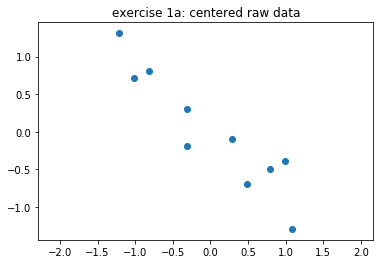

In [5]:
# 2.1 a) plot
plotscatter(x, title="exercise 1a: centered raw data");

## 2.1 b)
- Determine the Principal Component Directions (PCs) 
- scatter plot in the coordinate system spanned by the 2 PCs.

$$x_{eig} = e_{vect}^T X $$

In [6]:
# 2.1b) logic
c = np.dot(x.T, x) / (x.shape[0] - 1)       # compute the covariance matrix
evalue, evector = np.linalg.eig(c)          # eigenvalue eigenvector decomposition; evector = PCs
evalue, evector = arraySort(evalue,evector) # sort the evector by the size of the evalues
x_eig = project(x, evector)                 # x_eig-matrix contains data points x in eigenbasis
print ("Each column of evector is an eigenvector: ev = (ev_1, ev_2)", 
       np.dot(evector[:,0], c) - np.dot(evalue[0], evector[:,0]))

Each column of evector is an eigenvector: ev = (ev_1, ev_2) [ 0.  0.]


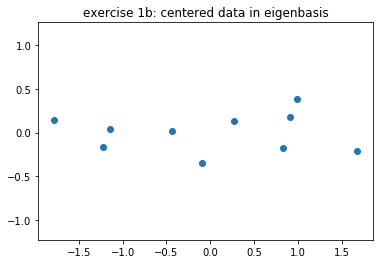

In [7]:
# 2.1b) Plot
plotscatter(x_eig, title="exercise 1b: centered data in eigenbasis")

## 2.1 c)
- Plot the reconstruction of the data in the original coordinate system when using
    - (i) only the first or 
    - (ii) only the second PC for reconstruction.
$e_i$
$$x_{eig} = e_{vect}^T X $$
- <p style="color:#FFA500">Reconstruction to smaller (first) evector:</p> $$\left(e_{vec}^{(0)}\right)^T C e_{vec}^{(0)} \in \mathbb{R}^2$$
-  <p style="color:green">Reconstruction to larger (second) evector:</p> $$\left(e_{vec}^{(1)}\right)^T C e_{vec}^{(1)} \in \mathbb{R}^2$$

In [8]:
# 2.1c) logic. Projection to principal component and reconstruction.
# (2, 10, 2)
x_proj = np.array([projectToPC(x, evector[i]) for i in np.arange(evector.shape[0])]) 

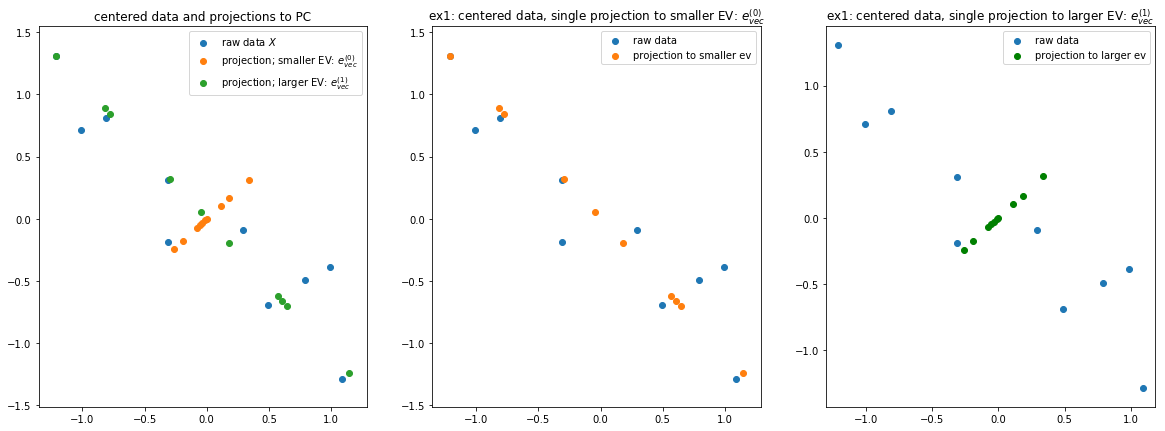

In [9]:
# 2.1c) plot
plt.figure(figsize=(20,7))
plt.subplot(131)
plotscatter(x, label="raw data $X$")
plotscatter(x_proj[0,:], label="projection; smaller EV: $e_{vec}^{(0)}$")
plotscatter(x_proj[1,:], title="centered data and projections to PC", label="projection; larger EV: $e_{vec}^{(1)}$")

plt.subplot(132)
plotscatter(x, label="raw data")
plotscatter(x_proj[1], title="ex1: centered data, single projection to smaller EV: $e_{vec}^{(0)}$", label="projection to smaller ev")

plt.subplot(133)
plotscatter(x, label="raw data")
plotscatter(x_proj[0], title="ex1: centered data, single projection to larger EV: $e_{vec}^{(1)}$",  label="projection to larger ev", color="green")


# 2.2
## 2.2 a)
- Load, center, plot

In [10]:
# 2.2 a) - Logic
x = np.genfromtxt("pca-data-3d.txt", dtype="double", delimiter=",")[1:]
x = x - np.mean(x, axis=0)

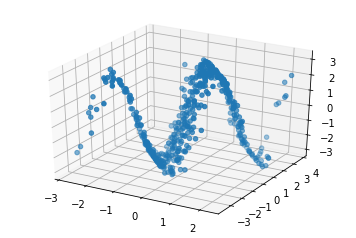

In [11]:
plotscatter3d(x)

# 2.2 b)
- Determine the PCs 
- Scatter plot for 2d-coordinate systems spanned by the different pairs of PCs.

In [12]:
c = np.dot(x.T, x) / (x.shape[0]-1) # covariance matrix
evalue, evector = np.linalg.eig(c)  # eigenvalue eigenvector decomposition; evector = PCs
evalue, evector = arraySort(evalue,evector)
x_proj = project(x, evector)         # this matrix contains the data points x in eigenbasis

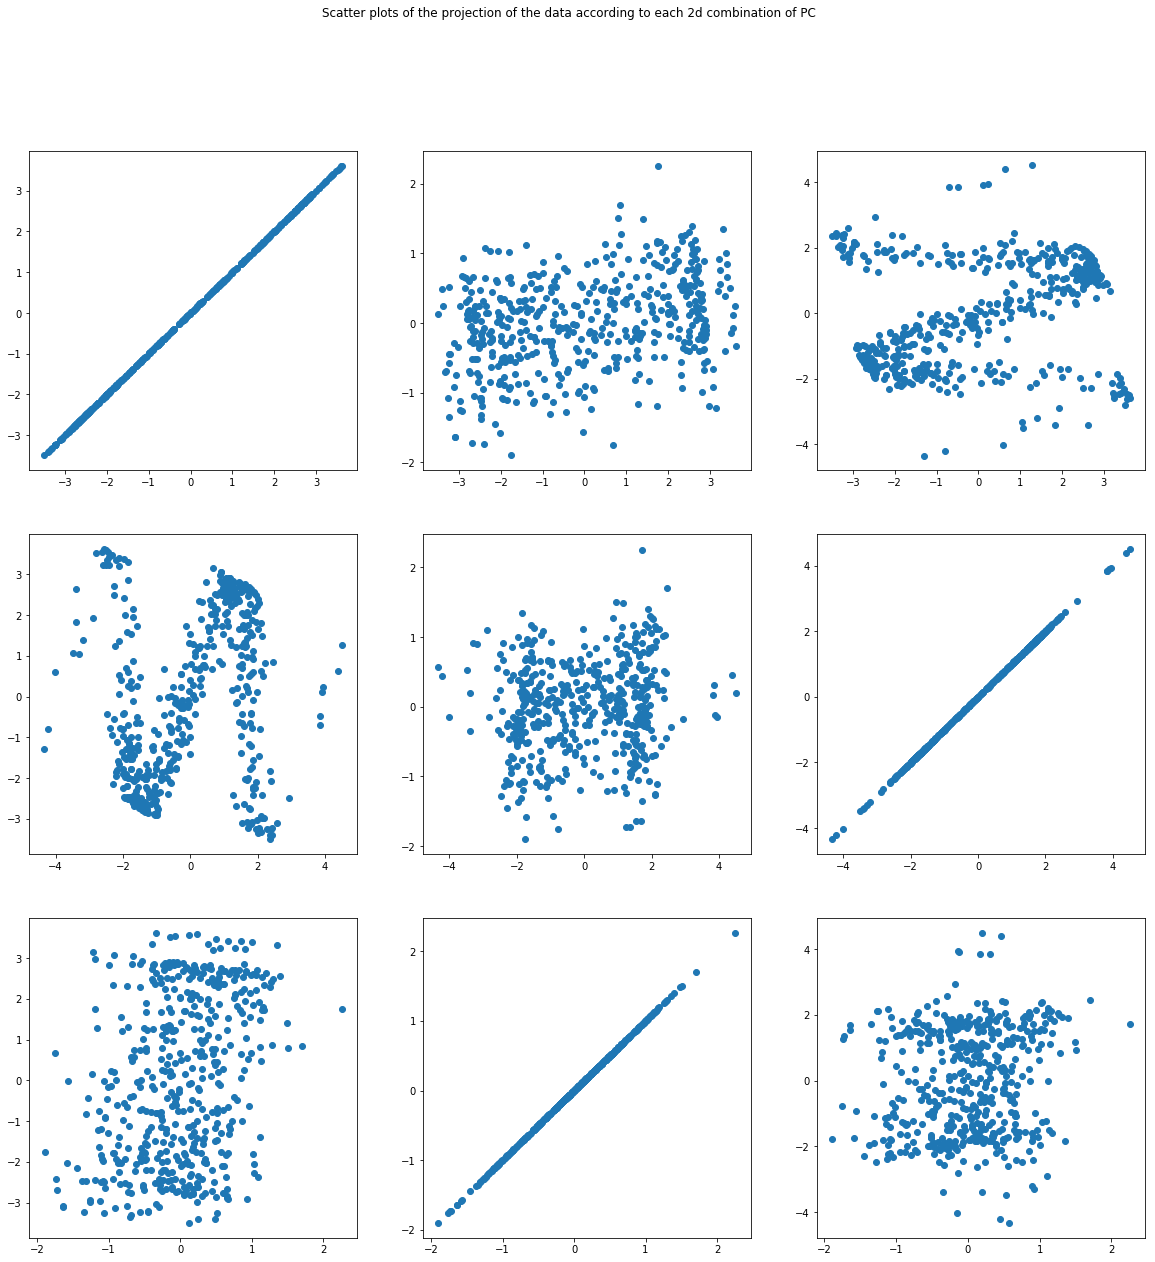

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
fig.suptitle('Scatter plots of the projection of the data according to each 2d combination of PC')
for i in range(0,3):
    for b in range(0,3):
        x_proj = project(x,np.array([evector[i,:],evector[b,:]]).T)
        axes[i,-b].scatter(x_proj[:,0], x_proj[:,1])
        plt.plot()

## 2.2 c)
- 3d-reconstruction of the data in the original coordinate systems 
    - (i) the first, 
    - (ii) the first two
    - (iii) all three PCs

How useful are the different principal components?


In [14]:
# 2.2 c)
projectToPC = lambda point, pc: project(project(point, pc)[np.newaxis].T, \
                                        pc[np.newaxis])
x_proj = projectToPC(x, evector[0]) # (2, 10, 2)

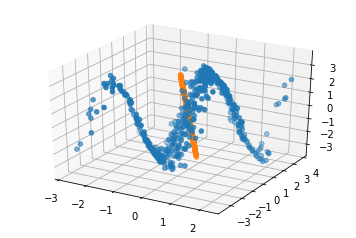

In [15]:
# 1st pc
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2])
ax.scatter(x_proj[:,0],x_proj[:,1],x_proj[:,2])
plt.show()

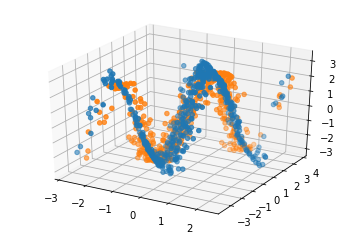

In [16]:
# 2nd pc
projectToPC = lambda point, pc: project(project(point, pc.T), pc)
x_proj = projectToPC(x, evector[0:2,:]) # (2, 10, 2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2])
ax.scatter(x_proj[:,0],x_proj[:,1],x_proj[:,2])
plt.show()

(3, 2)


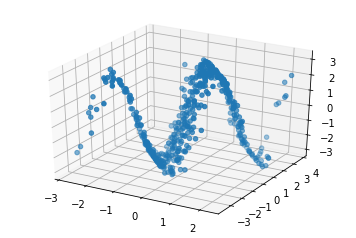

In [17]:
print(evector[:,0:2].shape)
projectToPC = lambda point, pc: project(project(point, pc.T), pc)
x_proj = projectToPC(x, evector) # (2, 10, 2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_proj[:,0],x_proj[:,1],x_proj[:,2]);#, color="orange")
plt.show();

### Discuss how useful..

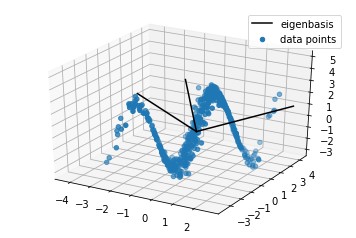

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0],x[:,1],x[:,2], label="data points")
ax.plot([0,5*evector[0,0]],[0,5*evector[0,1]],[0,5*evector[0,2]], color="black", label="eigenbasis")
ax.plot([0,5*evector[1,0]],[0,5*evector[1,1]],[0,5*evector[1,2]], color="black")
ax.plot([0,5*evector[2,0]],[0,5*evector[2,1]],[0,5*evector[2,2]], color="black")
plt.legend();

[]

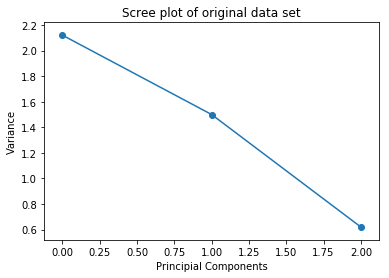

In [19]:
plt.plot(np.arange(len(evalue)), np.sqrt(evalue))
plt.scatter(np.arange(len(evalue)), np.sqrt(evalue))
plt.title('Scree plot of original data set')
plt.xlabel('Principial Components')
plt.ylabel('Variance')
plt.plot()

## 2.3 Projections of a dynamical system
### a) Find 20 Principal Conponents

In [20]:
# 2.3 a) PCA
import warnings
warnings.filterwarnings('ignore')

# dataset: 20 processes, each measured for 100 time steps
x = np.genfromtxt('expDat.txt', delimiter=',', dtype=int)[1:,1:]
print(x.shape)

(100, 20)


In [21]:
# covariance matrix
c = np.dot(x.T, x) / (x.shape[0]-1)

In [22]:
# eigenvalue eigenvector decomposition; evector = PCs
evalue, evector = np.linalg.eig(c)
evalue, evector = arraySort(evalue,evector)
print(evector.shape)

(20, 20)


### b) Plot temporal evolution of the system projected onto the first two PCs

In [23]:
# 2.3 b) temporal evolution
# x_proj contains the data points x projected onto the first two PCs
x_proj = project(x, np.array([evector[:,0], evector[:,1]]).T)
print(x_proj.shape)

(100, 2)


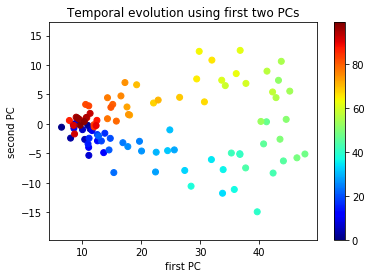

In [24]:
title='Temporal evolution using first two PCs'
plt.scatter(x_proj[:,0], x_proj[:,1], c=range(x_proj.shape[0]), cmap='jet')
plt.title(title)
plt.axis('equal')
plt.xlabel('first PC')
plt.ylabel('second PC')
plt.legend()
plt.colorbar()

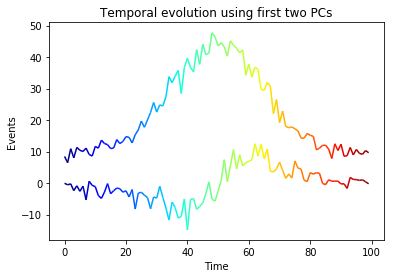

In [25]:
from matplotlib.collections import LineCollection
# http://stackoverflow.com/questions/10252412/matplotlib-varying-color-of-line-to-capture-natural-time-parameterization-in-da

t = np.linspace(0,1,x_proj.shape[0])
# first PC
points = np.array([np.arange(0,100),x_proj[:,0]]).transpose().reshape(-1,1,2)
segs = np.concatenate([points[:-1],points[1:]],axis=1)
lc = LineCollection(segs, cmap=plt.get_cmap('jet'))
lc.set_array(t)
plt.gca().add_collection(lc)
# second PC
points2 = np.array([np.arange(0,100),x_proj[:,1]]).transpose().reshape(-1,1,2)
segs2 = np.concatenate([points2[:-1],points2[1:]],axis=1)
lc2 = LineCollection(segs2, cmap=plt.get_cmap('jet'))
lc2.set_array(t)
plt.gca().add_collection(lc2)

plt.xlim(-5, 104)
plt.ylim(-18, 51) #plt.ylim(min(x_proj[:,0].min(), x_proj[:,1].min()), max(x_proj[:,0].max(), x_proj[:,1].max()))
plt.title(title)
plt.xlabel('Time')
plt.ylabel('Events')

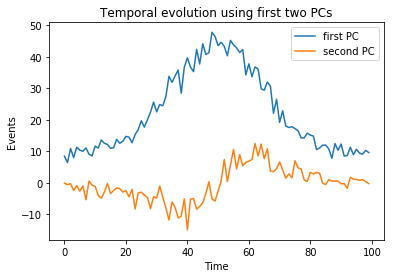

In [26]:
first_pc = plt.plot(x_proj[:,0], label='first PC')
second_pc = plt.plot(x_proj[:,1], label='second PC')
plt.legend()
plt.title(title)
plt.xlabel('Time')
plt.ylabel('Events')

### c) New shuffled data set

In [27]:
# 2.3 c) shuffle values within event column
x_per = np.array([np.random.permutation(i) for i in x.T]).T

### d) Plot covariance matrices and scree plots for original and shuffled data

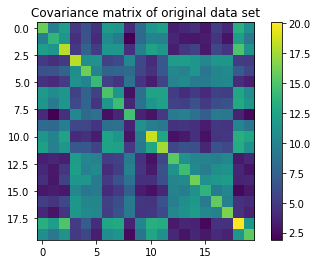

In [28]:
# 2.3 d) comparison covariance and scree plots
C_x = np.cov(x,rowvar=False)
C_per = np.cov(x_per,rowvar=False)

plt.imshow(C_x)
plt.title('Covariance matrix of original data set')
plt.colorbar()

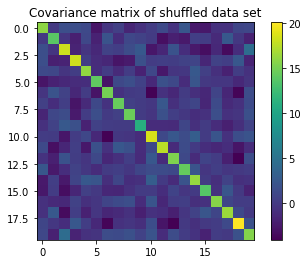

In [29]:
plt.imshow(C_per)
plt.title('Covariance matrix of shuffled data set')
plt.colorbar()

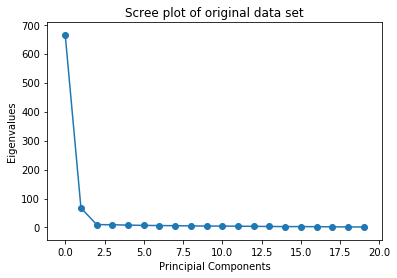

In [30]:
plt.plot(np.arange(len(evalue)), evalue)
plt.scatter(np.arange(len(evalue)), evalue)
plt.title('Scree plot of original data set')
plt.xlabel('Principial Components')
plt.ylabel('Eigenvalues')

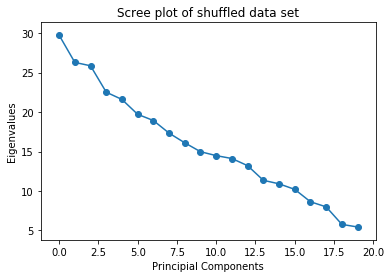

In [31]:
evalue_per, evector_per = np.linalg.eig(C_per)  # eigenvalue eigenvector decomposition; evector = PCs
evalue_per, evector_per = arraySort(evalue_per, evector_per)

plt.plot(np.arange(len(evalue_per)), evalue_per)
plt.scatter(np.arange(len(evalue_per)), evalue_per)
plt.title('Scree plot of shuffled data set')
plt.xlabel('Principial Components')
plt.ylabel('Eigenvalues')

### Interpretation
#### Covariance matrices
The corellation in the original data set is visible in the plot of the covariance matrix. There is no visible correlation in the shuffeld data set, because all values other than the diagonal are equally low.
#### Scree plots
Original data set: the first two PCs are relevant for data variance, the rest of the PCs are irrelevant and can be interpreted as noise.
Shuffled data set: the line form follows from ordering the eigenvalues from largest to smallest, there is no possiblity to distinguish between relevant and irrelevant PCs.

### e) New shuffled data set: randomized row order
The timesteps will be in a different order, but the correlation between the different timesteps will be preserved. We expect the plot of the temporal evolution using the first two PCs to be similar to the one with the original data, only the color code showing the circle evolution over time will change, because the order of the timesteps changed.



## 2.4

In [32]:
# load directory which contains unzipped images
from os import listdir
from os.path import isfile, join
mypath = "imgpca"
onlyfiles = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and ("_" not in str(f)))]
images_by_category = dict()
for file in onlyfiles:
    try:
        images_by_category[file[0]].append(file)
    except KeyError:
        images_by_category[file[0]] = [file,]
print(images_by_category)

{'b': ['b1.jpg', 'b10.jpg', 'b2.jpg', 'b3.jpg', 'b4.jpg', 'b5.jpg', 'b6.jpg', 'b7.jpg', 'b8.jpg', 'b9.jpg'], 'd': ['d1.jpg', 'd10.jpg', 'd11.jpg', 'd12.jpg', 'd2.jpg', 'd3.jpg', 'd4.jpg', 'd5.jpg', 'd6.jpg', 'd7.jpg', 'd8.jpg', 'd9.jpg'], 'n': ['n1.jpg', 'n10.jpg', 'n11.jpg', 'n12.jpg', 'n13.jpg', 'n2.jpg', 'n3.jpg', 'n4.jpg', 'n5.jpg', 'n6.jpg', 'n7.jpg', 'n8.jpg', 'n9.jpg'], 't': ['t1.jpg', 't10.jpg', 't11.jpg', 't12.jpg', 't13.jpg', 't14.jpg', 't2.jpg', 't3.jpg', 't4.jpg', 't5.jpg', 't6.jpg', 't7.jpg', 't8.jpg', 't9.jpg']}


18476
152.896923077
(256, 256)
8
139.734
(256, 256)


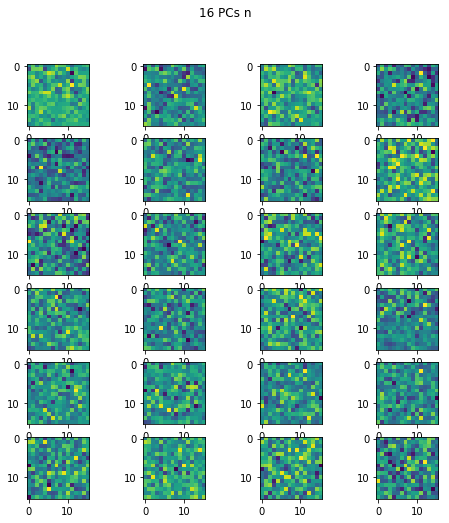

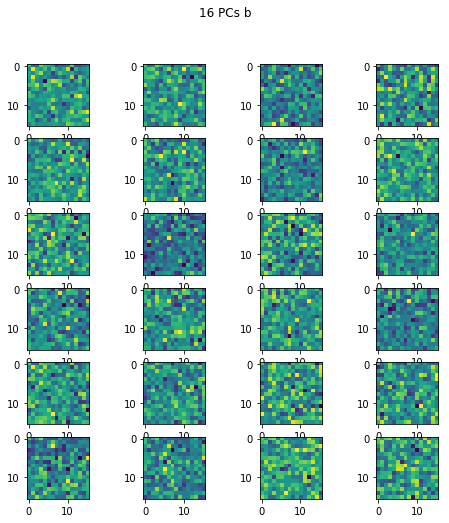

In [33]:
# Sample subset
width = 16
patches_per_image = 500
#exercise a: Create Nx256 matrix
eigenwerte = dict()
eigenvectors = dict()
for prefix in ["n","b"]:
    patches = np.zeros(shape=(len(images_by_category[prefix])*patches_per_image,256))
    for idx, f in enumerate(images_by_category[prefix]):
        image = img.imread(join(mypath,f))
        # Sample 500 16*16 patches per image
        for i in range(0,patches_per_image-1):
            column = np.random.randint(0,image.shape[0]-width)
            row = np.random.randint(0,image.shape[1]-width)
            patch = image[column:column+width,row:row+width].flatten()
            patches[idx*patches_per_image + i] = patch
            
    #Exercise b: Calculate PCs and show them as images
    m_patches = patches - np.mean(patches, axis=0)
    print(patches.argmax())
    print(m_patches.max())
    c = np.dot(m_patches.T, m_patches) / (m_patches.shape[0]-1)
    evalue, evector = np.linalg.eig(c)
    
    # Plot the PCs
    fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(8,8))
    fig.suptitle("16 PCs {}".format(prefix))
    print(evector.shape)
    for c in range(0,4):
        for r in range(0,6):
            axes[r,c].imshow(evector[c+(r*4)].reshape(16,16))
    
    # Save copy for scree plot
    eigenwerte[prefix] = evalue[:]
    eigenvectors[prefix] = evector[:]

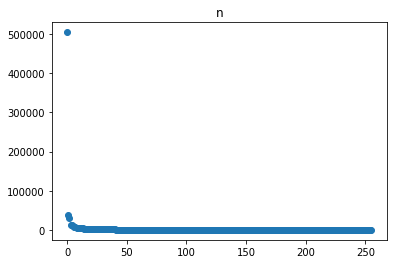

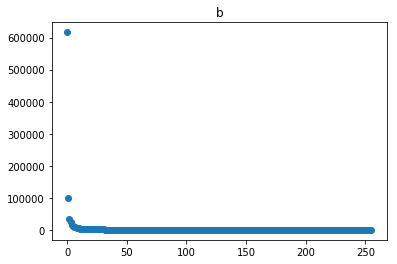

In [34]:
# Scree plot of Eigenwerte
for prefix in ["n","b"]:
    eigenwerte[prefix].sort()
    y = eigenwerte[prefix][::-1]
    x = np.asarray(range(0,len(y)))
    plt.figure()
    plt.title(prefix)
    plt.scatter(x,y)

As can be seen in the scree-plot, only the first few PCs make sense to use.
For category __n__ this is __3__ and for __b__ it is 2-3 (we will go with __3__).

## TODO: What is the respective compression ratio? (is it 3 / 256 + the overhead of storing the vectors?)

n1.jpg
(256, 512)
n10.jpg
(256, 512)
n11.jpg
(256, 512)
b1.jpg
(353, 500)
b10.jpg
(500, 334)
b2.jpg
(500, 443)


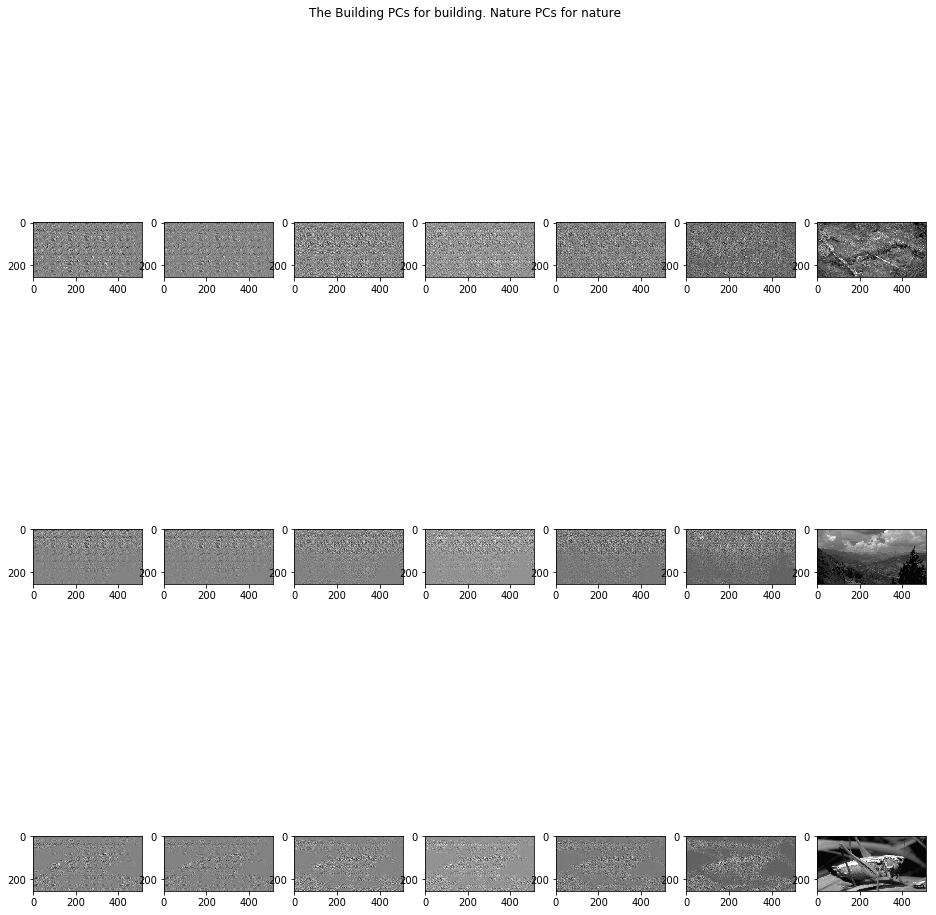

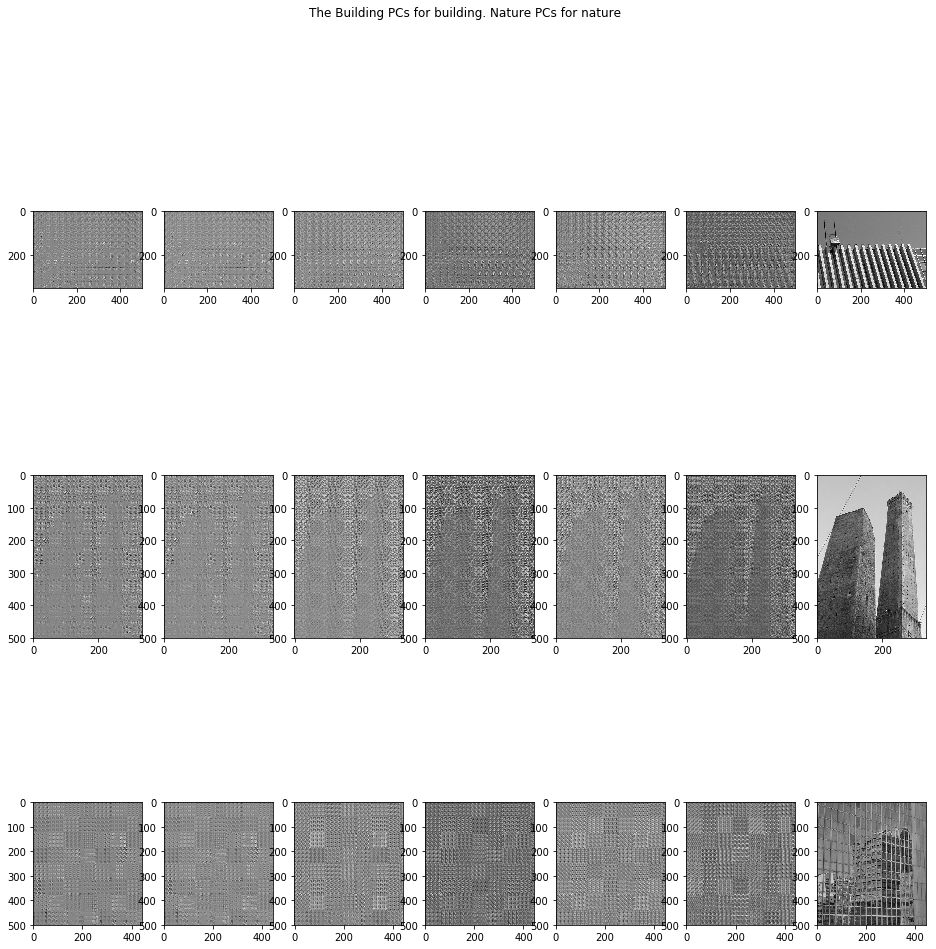

In [35]:
# Reconstruct 3 arbitrary images by projecting all of its constituent (non-overlapping1) 16x16-
# patches onto the first n PCs of that image category

patch_width = 16
N = [1,2,4,8,16,100,256]
def projecting_haze(eigenwerte, eigenvectors,file_names,prefix):
    fig, axes = plt.subplots(nrows=3, ncols=len(N), figsize=(16,16))
    fig.suptitle(prefix)
    # Choose 3 images
    for image_number, f in [(i,image) for (i,image) in enumerate(file_names) if i < 3]:
        print(f)
        image = img.imread(join(mypath,f))
        print(image.shape)
        
        # Iterate over the image and fill patches into array. At boundaries we need to have overlapping patches
        for i,n in enumerate(N):
            flat_image = image[:].flatten()
            proj_image = np.zeros(flat_image.shape)
            reconstructed_image = np.zeros(image.shape)
            # Take the first n vectors
            _, pcs = arraySort(eigenwerte,eigenvectors)
            pcs = pcs[:n].T 
            # Project the patches using the PCs
            
            # +1 offset to make sure, we always have a patch for the end (range ends excusively)
            for column_pixel in range(0,image.shape[1]+1,patch_width):
                # overlap at  boundary
                if column_pixel + patch_width >= image.shape[1]:
                    column_pixel = image.shape[1] - patch_width
                for row_pixel in range(0,image.shape[0]+1,patch_width):
                    if row_pixel + patch_width >= image.shape[0]:
                        row_pixel = image.shape[0] - patch_width
                    # Extract the patch by taking a square from (0,0) to (15,15) with different offsets
                    patch = image[row_pixel:row_pixel + patch_width,column_pixel:column_pixel + patch_width]
                    #
                    projected_patch = np.dot(patch.flatten(),pcs)
                    reconstructed_patch = np.dot(projected_patch,pcs.T)
                    #print(reconstructed_patch)
                    reconstructed_image[row_pixel:row_pixel + patch_width,column_pixel:column_pixel + patch_width] = \
                        reconstructed_patch.reshape((patch_width,patch_width))    
            
            # Plot the picture with n used PCs
            axes[image_number,i].imshow(reconstructed_image,cmap='gray')

for prefix in ["n","b"]:
    projecting_haze(eigenwerte[prefix],eigenvectors[prefix],images_by_category[prefix],"The Building PCs for building. Nature PCs for nature")


Nature PCs on building-images
b1.jpg
(353, 500)
b10.jpg
(500, 334)
b2.jpg
(500, 443)
Building PCs on nature-images
n1.jpg
(256, 512)
n10.jpg
(256, 512)
n11.jpg
(256, 512)


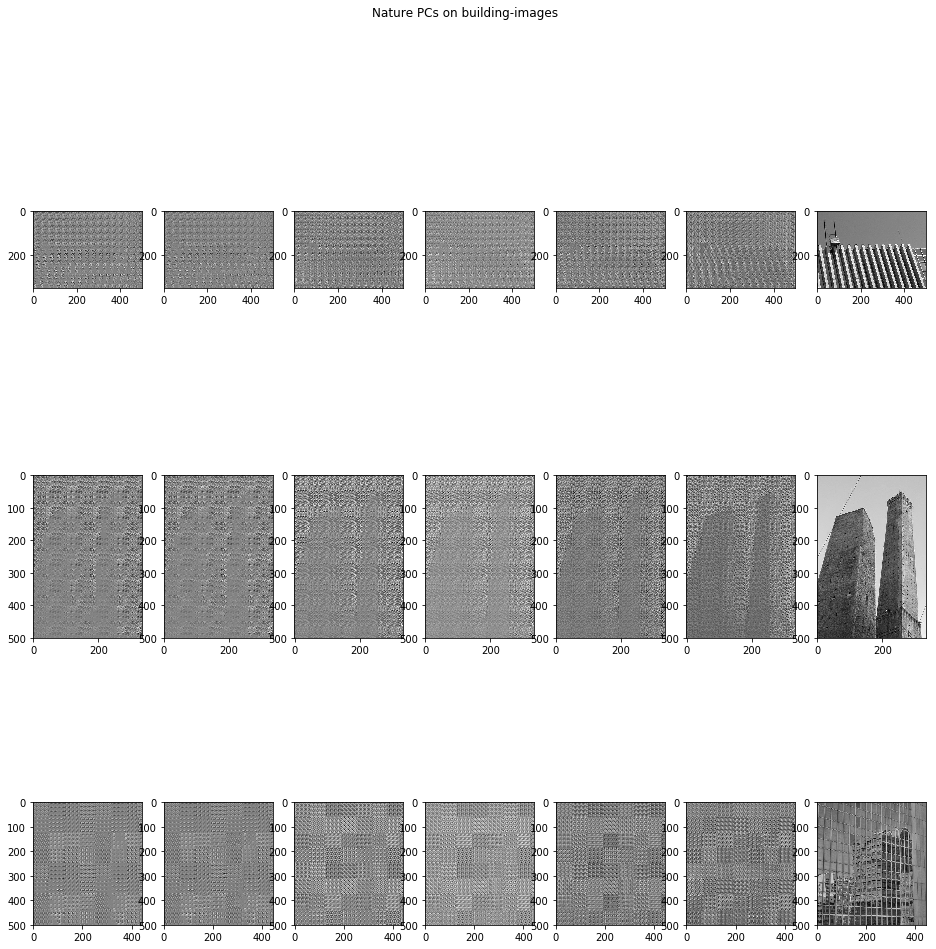

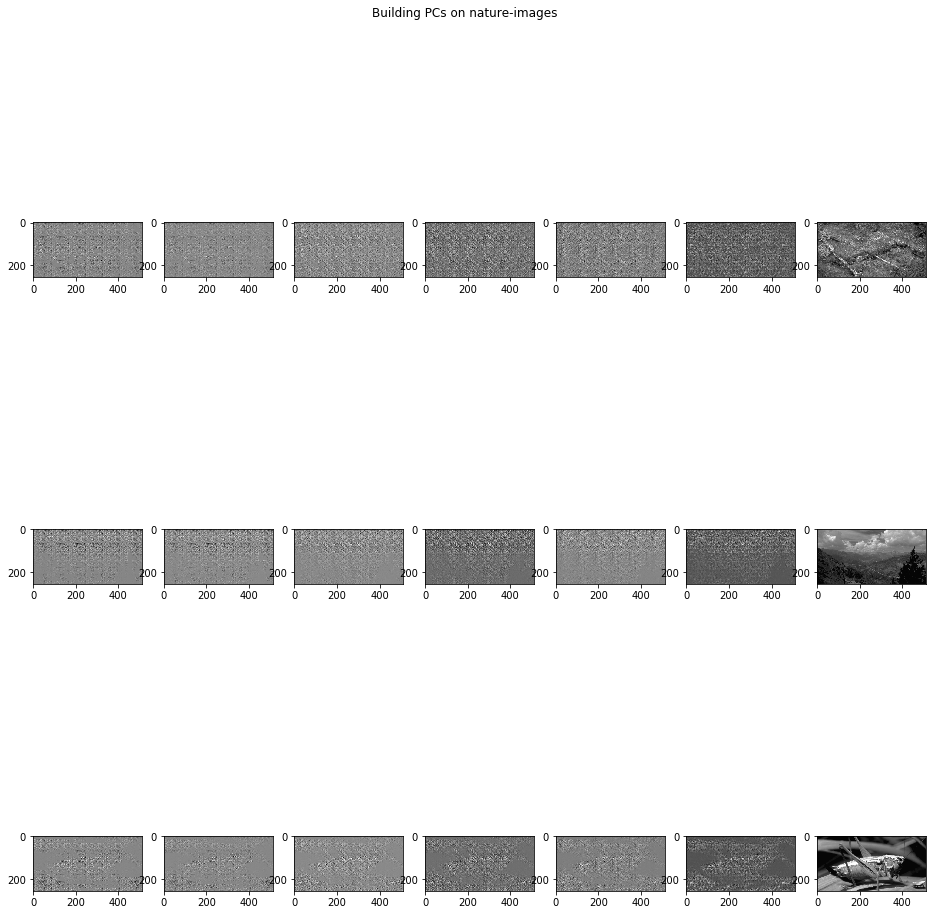

In [36]:
print("Nature PCs on building-images")
projecting_haze(eigenwerte["n"],eigenvectors["n"],images_by_category["b"],"Nature PCs on building-images")
print("Building PCs on nature-images")
projecting_haze(eigenwerte["b"],eigenvectors["b"],images_by_category["n"],"Building PCs on nature-images")
